Công ty của bạn hiện nay đang muốn đẩy mạnh hoạt động kinh doanh bằng cách tập chung các chiến lược khác nhau cho các nhóm khách hàng khác nhau. Như vậy việc quan trọng là cần phân khách hàng thành các nhóm cụ thể dựa trên một số yếu tố nào đó. Nhiệm vụ của bạn là tìm các yếu tố đó và phân khách hàng vào các nhóm cụ thể

Bạn sẽ được cung cấp một bộ dữ liệu để thực hiện xây dựng mô hình phân nhóm khách hàng:

Thông tin các cột trong file dữ liệu:
* **InvoiceNo**: Id Hoá đơn
* **StockCode**: Id của các mặt hàng đã mua
* **Description**: Môt tả của mặt hàng
* **Quantity**: Số lượng của mặt hàng đã mua.
* **InvoiceDate**: Ngày mua
* **UnitPrice**: Giá của mặt hàng
* **CustomerID**: Id khách hàng đã mua hàng
* **Country**: Tên quốc gia của khách hàng



## Customer Segmentation:

Customer segmentation là quá trình phân chia khách hàng của công ty, doanh nghiệp thành các nhóm hoặc phân khúc khác nhau dựa trên các thuộc tính khác nhau của khách hàng. Quá trình phân khúc khách hàng dựa trên tìm kiếm sự khác biệt giữa hành vi hoặc đặc điểm của khách hàng.

Các mục tiêu và lợi ích chính của việc phân khúc khách hàng:

* **Tăng doanh thu:** Đây là mục tiêu rõ ràng nhất của bất kỳ nhiệm vụ phân khúc khách hàng nào
* **Hiểu khách hàng:** Một trong những mô hình kinh doanh được ngày càng phổ biến là “know your customer - KYC”, việc phân khúc được khách hàng sẽ giúp ích rất nhiều cho mô hình này.
* **Marketing:** Lợi ích dễ thấy nhất của việc phân khúc khách hàng là khả năng tập trung các tiếp thị một cách hiệu quả. Nếu một công ty biết các phân khúc khác nhau trong cơ sở khách hàng của mình, thì công ty có thể đưa ra các chiến dịch tiếp thị tốt hơn được thiết kế riêng cho phân khúc đó. Một mô hình phân khúc tốt cho phép hiểu rõ hơn về các yêu cầu của khách hàng và do đó làm tăng cơ hội thành công của bất kỳ chiến dịch tiếp thị nào do tổ chức phát triển.

* **Đặt vị trí thích hợp cho Sản phẩm** Một chiến lược phân khúc khách hàng tốt cũng có thể giúp công ty phát triển hoặc cung cấp các sản phẩm mới, hoặc một nhóm sản phẩm với nhau như một hình thức cung cấp kết hợp.
* **Tìm các phân khúc khách hàng tiềm ẩn:** Tìm ra phân khúc khách hàng có thể còn thiếu để xác định phân khúc khách hàng chưa được khai thác bằng cách tập trung vào các chiến dịch tiếp thị hoặc phát triển kinh doanh mới.

## Một số thuật ngữ, phương pháp sẽ được sử dùng trong bài ASM

#### 1. Clustering:
Phương pháp rõ ràng nhất để thực hiện phân khúc khách hàng là sử dụng các phương pháp Học máy không giám sát như phân cụm. Phương pháp này đơn giản nhất là thu thập càng nhiều dữ liệu về khách hàng càng tốt dưới dạng các tính năng hoặc thuộc tính và sau đó tìm ra các cụm khác nhau có thể thu được từ dữ liệu đó. Cuối cùng, chúng ta có thể tìm ra đặc điểm của các phân khúc khách hàng bằng cách phân tích các đặc điểm của các cụm.

#### 2.Exploratory Data Analysis - EDA

EDA là một cách khác để tìm ra phân khúc khách hàng. Điều này thường được thực hiện bởi các nhà phân tích có kiến ​​thức tốt về miền liên quan đến cả sản phẩm và khách hàng. Nó có thể được thực hiện một cách linh hoạt khi đưa ra các quyết đinh định trong một phân tích.

#### 3. Mô hình RFM đại diện cho giá trị khách hàng:

Vì tập dữ liệu của chúng ta được giới hạn trong lịch sử bán hàng và không bao gồm thông tin ẩn danh về khách hàng, nên chúng ta sẽ sử dụng mô hình dựa trên RFM. Mô hình RFM sẽ lấy các giao dịch của một khách hàng và tính toán ba thuộc tính thông tin quan trọng về mỗi khách hàng:
* **Recency**: Giá trị của mức độ gần đây một khách hàng đã mua hàng
* **Frequency**: Mức độ thường xuyên của các giao dịch của khách hàng
* **Monetary value**: Số tiền (hoặc bảng Anh trong bài ASM) của tất cả các giao dịch mà khách hàng đã thực hiện


# 1. Import thư viện và tải dữ liệu

#### **Yêu cầu 1: Import thành công dữ liệu và thư viện**

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import datetime
import math
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import plotly as py
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.graph_objs as go
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
# Ham ve bieu do phan phoi
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))
    (mu, sigma) = norm.fit(data)
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [3]:
df = pd.read_csv('Online Retail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# 2. Hiểu dữ liệu

#### **Yêu cầu 2: Hiển thị thông tin mô tả của bộ dữ liệu, bao gồm các giá trị như min, max, mean, std ...**

In [4]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### **Yêu cầu 3: Trả lời các câu hỏi**

Nhìn vào bảng mô tả phía trên, chúng ta có thể thấy cột **Quantity** và **UnitPrice** có xuất hiện giá trị âm, điều này là không hợp lý trừ khi sẽ có những giao dịch dạng trả hàng thì sẽ khiến hai cột này có giá trị âm. Mục tiêu của chúng ta là phân khúc hàng nên chúng ta sẽ cần loại bỏ những giá trị này (chỉ cần quan tâm những khách hàng mua hàng, những khách hàng trả hàng chúng ta không cần quan tâm đến).

Bạn cần trả lời các câu hỏi sau:
* Kiểm tra xem có giao dịch nào có Quantity và  UnitPrice đều nhỏ hơn 0 hay không:
* Kiểm tra xem có bao nhiêu giao dịch có Quantity < 0 và Unitpirce = 0 hoặc ngược lại:
* ID các khách hàng ở trong các giao dịch ở ý trên là gì:
* Tỷ lệ Quantity nhỏ hơn 0 trên tất cả các giao dịch là bao nhiêu:
* Tất cả các giao dịch với Quantity âm đều có Hoá đơn bắt đầu bằng ký tự gì:


In [5]:
#Kiểm tra xem có giao dịch nào có Quantity và  UnitPrice đều nhỏ hơn 0 hay không:
df[(df['Quantity'] < 0) & (df['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [6]:
#Kiểm tra xem có bao nhiêu giao dịch có Quantity < 0 và Unitpirce = 0 hoặc ngược lại:
df[(df['Quantity'] < 0) & (df['UnitPrice'] == 0)]
#df[(df['Quantity'] == 0) & (df['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [7]:
#ID các khách hàng ở trong các giao dịch ở ý trên là gì:
df[(df['Quantity'] < 0) & (df['UnitPrice'] == 0)].index.values

array([  2406,   4347,   7188, ..., 535336, 536908, 538919], dtype=int64)

In [8]:
#Tỷ lệ Quantity nhỏ hơn 0 trên tất cả các giao dịch là bao nhiêu:
(len(df[df['Quantity'] < 0]) / len(df))*100

1.9604767590130447

In [9]:
#Tất cả các giao dịch với Quantity âm đều có Hoá đơn bắt đầu bằng ký tự gì:
df[df['Quantity'] < 0]['InvoiceNo']

141       C536379
154       C536383
235       C536391
236       C536391
237       C536391
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 10624, dtype: object

## 3. Data preparation

Khi chúng ta đã tạo tập dữ liệu giá trị khách hàng của mình, chúng ta sẽ thực hiện một số bước tiền xử lý dữ liệu. Trong trường hợp này, chúng ta sẽ sử dụng thuật toán phân cụm K-mean. Một trong những yêu cầu để thuật toán hoạt động đúng cách là chuẩn hoá giá trị các biến tính năng. Căn giữa trung bình của một giá trị là việc thay thế giá trị thực của biến bằng một giá trị chuẩn hóa, để biến có giá trị trung bình là 0 và phương sai là 1. Điều này đảm bảo rằng tất cả các biến đều nằm trong cùng một phạm vi.

Trong các dữ liệu có biến Price hay giá tiền thì thường những biến này có giá trị rất lớn. Để giải quyết vấn đề này, chúng ta sẽ biến đổi tất cả các biến trên thang log. Việc chuyển đổi này, cùng với việc chuẩn hóa, sẽ đảm bảo rằng đầu vào cho thuật toán là một tập hợp các giá trị có cùng khoảng giá trị.

Một điểm quan trọng về bước tiền xử lý dữ liệu là đôi khi chúng ta cần nó có thể đảo ngược được. Trong trường ASM này, chúng ta sẽ có kết quả phân cụm của dữ liệu được biến đổi theo log. Nhưng để ánh xạ được về dữ liệu ban đầu, chúng ta sẽ cần phải chuyển đổi ngược lại tất cả các biến để chúng ta lấy lại các số liệu RFM (Recency, Frequency, Monetary) thực tế. Điều này có thể được thực hiện bằng cách sử dụng các hàm của Python.


#### **Yêu cầu 4: Thực hiện lần lượt các yêu cầu**

* Xoá tất cả các hàng có CustomerID là null
* Xoá tất cả các hàng có Quantity < 0
* Lấy các hàng có UnitPrice > 0

In [10]:
#Viet mã vào các dòng bên dưới ứng với từng yêu cầu
cs_df = df.dropna(subset='CustomerID')
cs_df = cs_df[cs_df['Quantity'] >=0]
cs_df = cs_df[cs_df['UnitPrice'] > 0]


In [11]:
cs_df.InvoiceDate = pd.to_datetime(cs_df.InvoiceDate)
cs_df['amount'] = cs_df.Quantity*cs_df.UnitPrice
cs_df.CustomerID = cs_df.CustomerID.astype('Int64')

#### **Yêu cầu 5: Tạo biến Recency và in ra thông tin mô tả của biến recency vừa được tạo**

Như ở mục giới thiệu chúng ta đã nhắc đến mô hình RFM, bây giờ chúng ta sẽ thực hiện tạo biến Recency, chúng ta cần quyết định ngày tham chiếu cho phân tích. Thông thường, chúng ta sẽ sử dụng ngày giao dịch cuối cùng cộng với một ngày. Sau đó, chúng ta sẽ xây dựng biến recency là số ngày trước ngày tham chiếu khi khách hàng mua hàng lần cuối.

Ví dụ: Ngày cuối cùng mà xuất hiện đơn mua hàng của khách hàng là ngày thứ 10 như vậy chúng sẽ lấy 10 + 1 = 11. Sau đó chúng ta sẽ lấy số 11 trừ đi ngày cuối cùng mà mỗi khách hàng mua hàng. Giả sử lần cuối cùng mà khách hàng A mua hàng là ngày 5, và lần cuối cùng mà khách hàng B mua hàng là ngày 7 ta sẽ có Recency cho khách hàng A sẽ là 11 - 5 = 6, và Recency cho khách hàng B là 11 - 7 = 4

In [12]:
last_invoice_date = max(cs_df['InvoiceDate'])
Recency = cs_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_invoice_date - x.max()).days + 1
})
Recency = Recency.rename(columns = {'InvoiceDate':'Recency'})
Recency.describe()

,Recency
count,4338.000000
mean,92.536422
std,100.014169
min,1.000000
25%,18.000000
50%,51.000000
75%,142.000000
max,374.000000


In [13]:

Recency1 = cs_df.groupby('CustomerID')['InvoiceDate'].apply(lambda x: (last_invoice_date - x.max()).days + 1)
Recency1.describe()


count    4338.000000
mean       92.536422
std       100.014169
min         1.000000
25%        18.000000
50%        51.000000
75%       142.000000
max       374.000000
Name: InvoiceDate, dtype: float64

#### **Yêu cầu 6. Trực quan hoá biến Recency bằng cách sử dụng Hàm QQ_plot**

C:\Users\acer\AppData\Local\Temp\ipykernel_62360\733115939.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


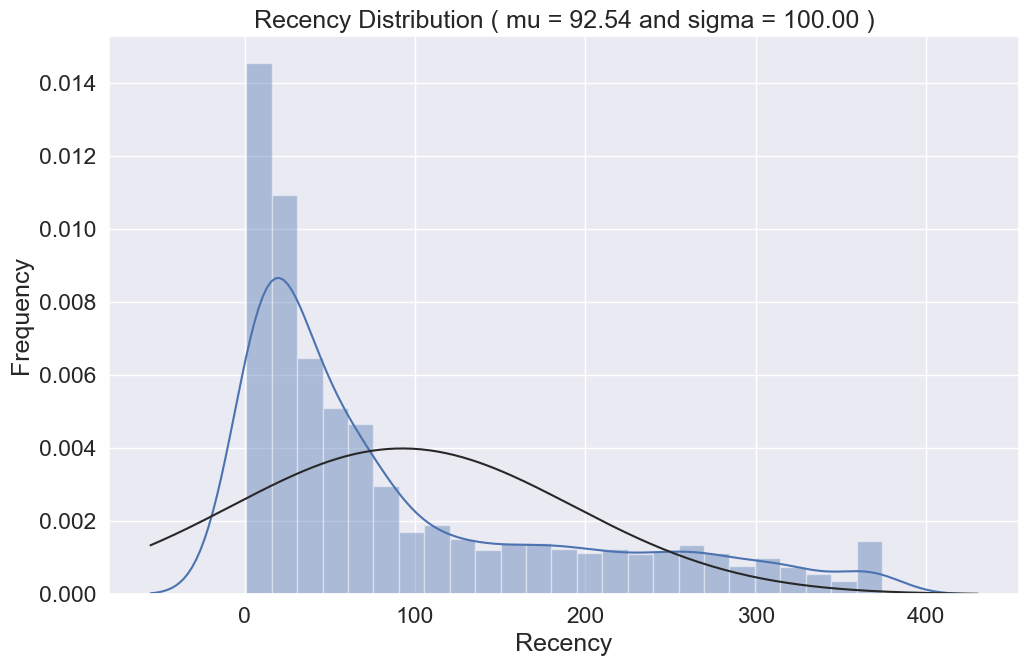

In [14]:
QQ_plot(Recency,'Recency')

Từ biểu trên, chúng ta có thể thấy rằng phân phối của Recency bị lệch, có đỉnh ở bên trái và đuôi dài ở bên phải. Nó lệch khỏi phân phối chuẩn và có xu hướng dương.


#### **Yêu cầu 7: Tạo biến Frequency và in ra thông tin mô tả của biến Frequency vừa tạo**

Các bạn sẽ tính Frequency bằng cách đếm số đơn hàng mà mỗi khách hàng đã thực hiện mua (Lưu ý là các đơn hàng sẽ dạng distinct)

In [15]:
Frequency = cs_df.groupby('CustomerID')['InvoiceNo'].nunique()
Frequency.describe()

count    4338.000000
mean        4.272015
std         7.697998
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: InvoiceNo, dtype: float64

#### **yêu cầu 8: Trực quan hoá Frequency với hàm QQ_plot**

C:\Users\acer\AppData\Local\Temp\ipykernel_62360\733115939.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


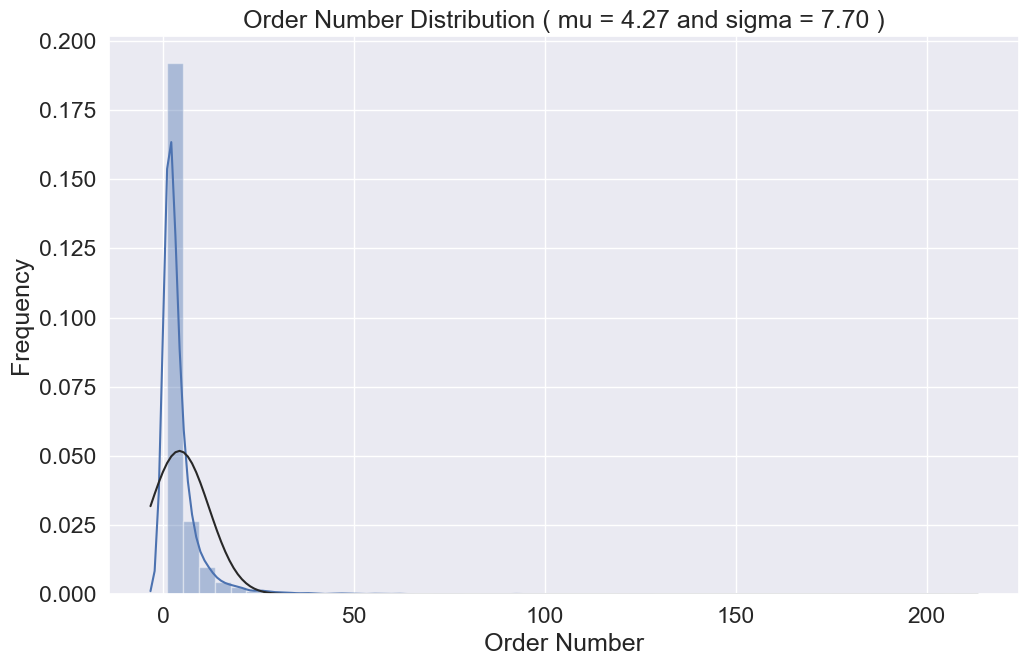

In [16]:
QQ_plot(Frequency,'Order Number')

Từ biểu trên, chúng ta có thể thấy rằng phân phối tần suất bán hàng bị lệch, có đỉnh ở bên trái và đuôi dài ở bên phải. Nó lệch khỏi phân phối chuẩn và có xu hướng dương.

#### **yêu cầu 9: Tạo biến Monetary Value**



Để tính Monetary Value, chúng ta sẽ tính sum amount được group by theo CustomerID

In [17]:
Monetary_Value = cs_df.groupby('CustomerID')['amount'].sum()
Monetary_Value.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: amount, dtype: float64

#### **Yêu cầu 10: Trực quan hoá Monetary Value với hàm QQ_plot**

C:\Users\acer\AppData\Local\Temp\ipykernel_62360\733115939.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


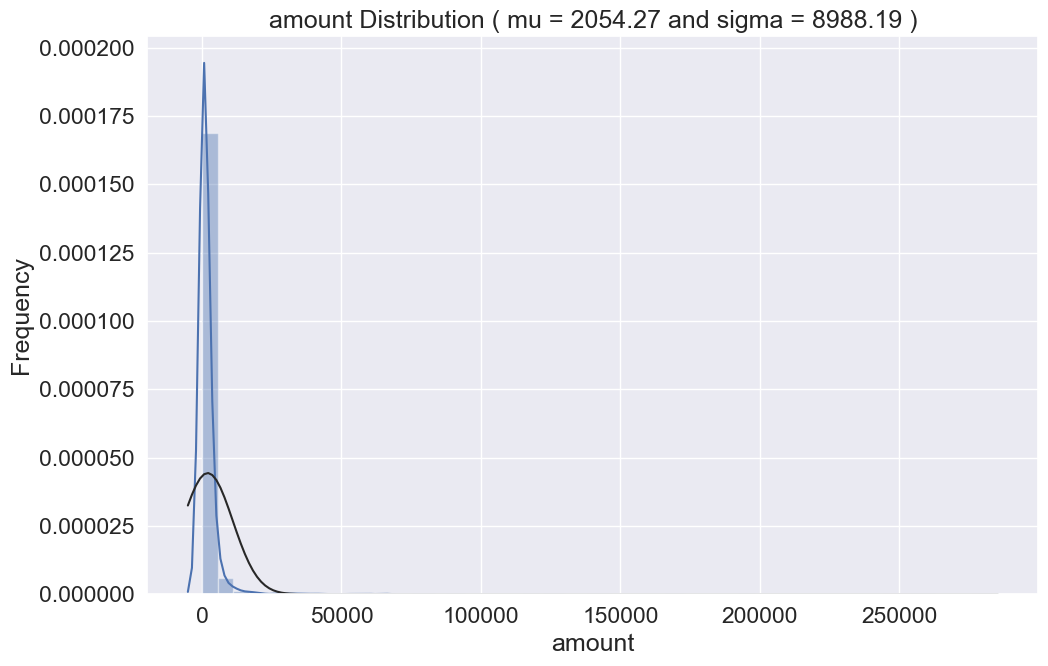

In [18]:
QQ_plot(Monetary_Value,'amount')

Từ biểu trên, chúng ta có thể thấy rằng phân phối  Monetary Value bị lệch, có đỉnh ở bên trái và đuôi dài ở bên phải. Nó lệch khỏi phân phối chuẩn và có xu hướng dương.

#### **Yêu cầu 11: Hiển thị ra thông tin mô tả của cả ba biến recency, frequency, amount theo CustomerID**

In [19]:
customer_history_df = Recency.join(Frequency)
customer_history_df = customer_history_df.join(Monetary_Value)
customer_history_df.rename(columns={'Recency':'recency',
                                    'InvoiceNo':'frequency'
                                    }, inplace = True)
customer_history_df.describe()

,recency,frequency,amount
count,4338.000000,4338.000000,4338.000000
mean,92.536422,4.272015,2054.266460
std,100.014169,7.697998,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,307.415000
50%,51.000000,2.000000,674.485000
75%,142.000000,5.000000,1661.740000
max,374.000000,209.000000,280206.020000



#### **Yêu cầu 12: Scale RBM trên thang đo log sau đó chuẩn hoá lại với StandardScaler**

Gợi ý: Sử dụng apply trong pandas kết hợp với math.log


In [20]:
customer_history_df_log = customer_history_df.applymap(math.log)
customer_history_df_log_standardized = StandardScaler().fit_transform(customer_history_df_log)
customer_history_df_log_standardized = pd.DataFrame(data = customer_history_df_log_standardized, columns=['recency_log', 'frequency_log', 'amount_log'], index=customer_history_df.index)
customer_history_df = customer_history_df.join(customer_history_df_log_standardized)
customer_history_df.describe()

,recency,frequency,amount,recency_log,frequency_log,amount_log
count,4338.000000,4338.000000,4338.000000,4.338000e+03,4.338000e+03,4.338000e+03
mean,92.536422,4.272015,2054.266460,-1.048288e-16,-9.991495e-17,-7.010426e-16
std,100.014169,7.697998,8989.230441,1.000115e+00,1.000115e+00,1.000115e+00
min,1.000000,1.000000,3.750000,-2.630445e+00,-1.048610e+00,-4.179280e+00
25%,18.000000,1.000000,307.415000,-6.124235e-01,-1.048610e+00,-6.841832e-01
50%,51.000000,2.000000,674.485000,1.147066e-01,-2.790440e-01,-6.094235e-02
75%,142.000000,5.000000,1661.740000,8.296516e-01,7.382675e-01,6.542440e-01
max,374.000000,209.000000,280206.020000,1.505796e+00,4.882714e+00,4.721395e+00


#### **Yêu cầu 13: Thực hiện vẽ biểu đồ Scatter và đưa ra nhận xét**

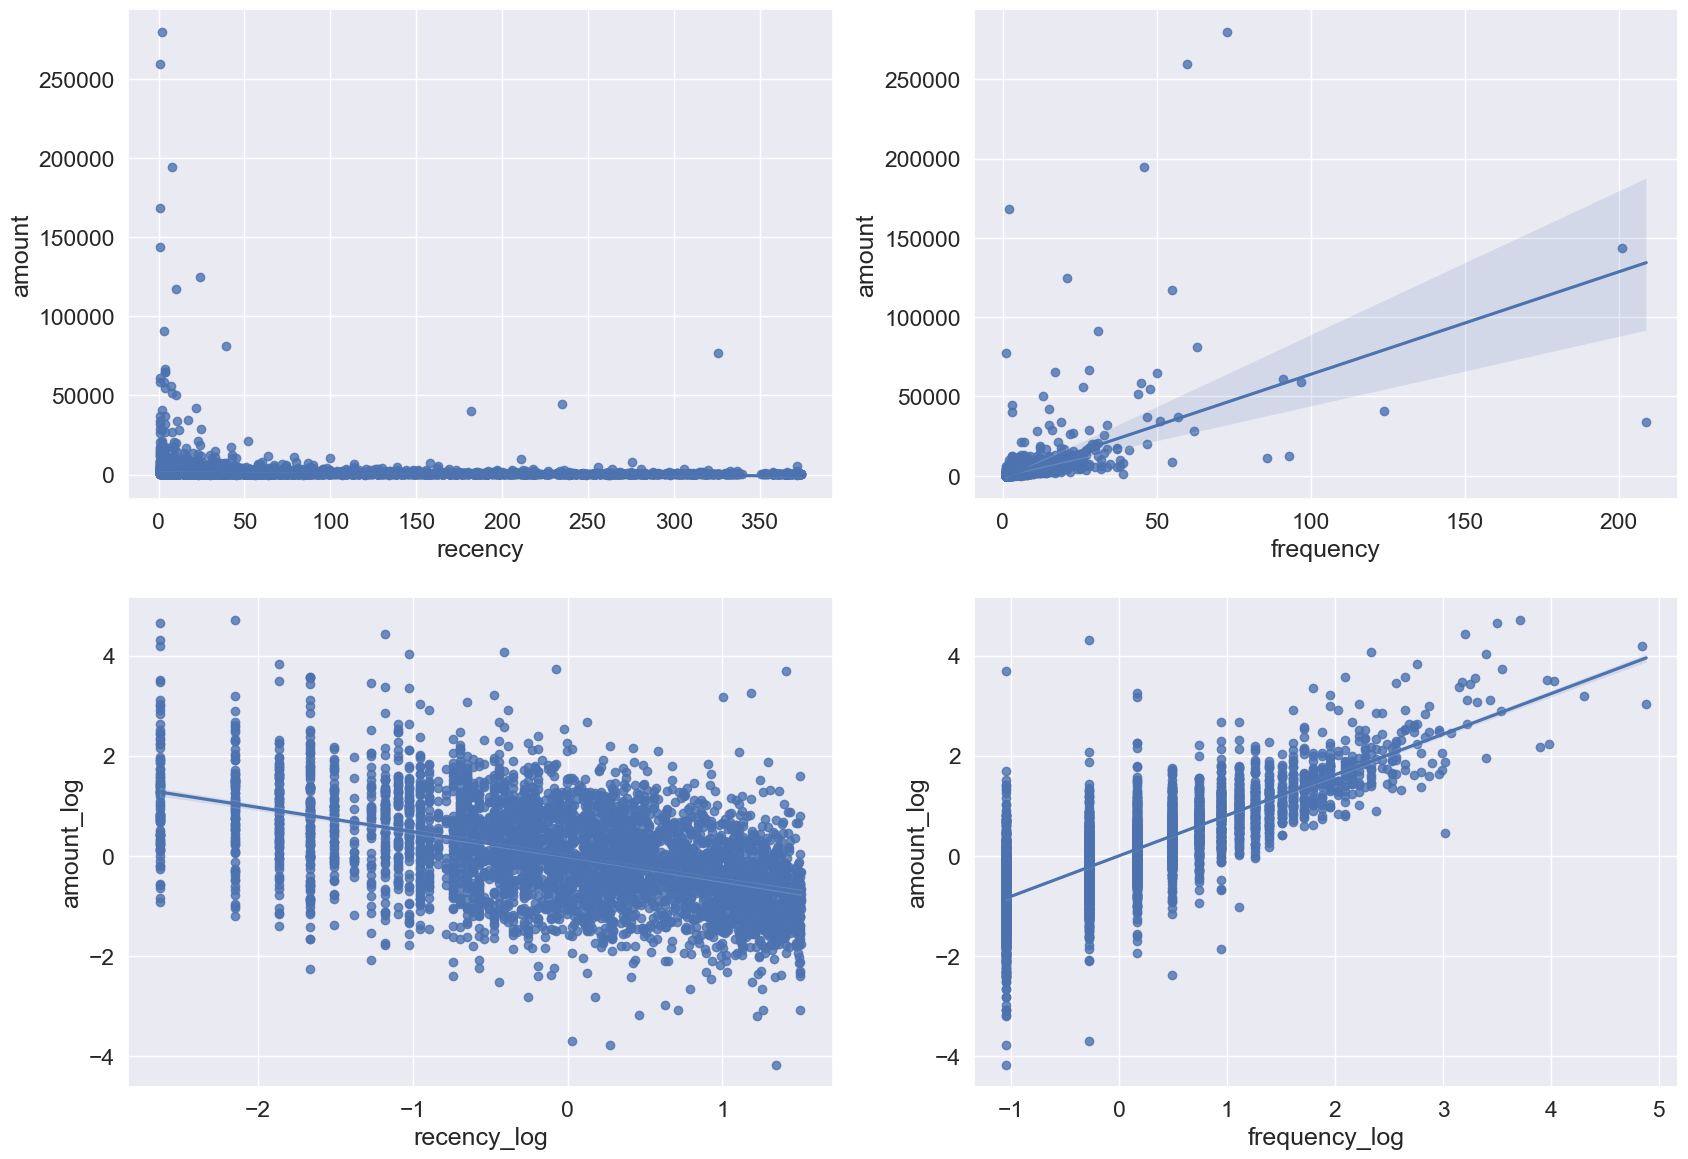

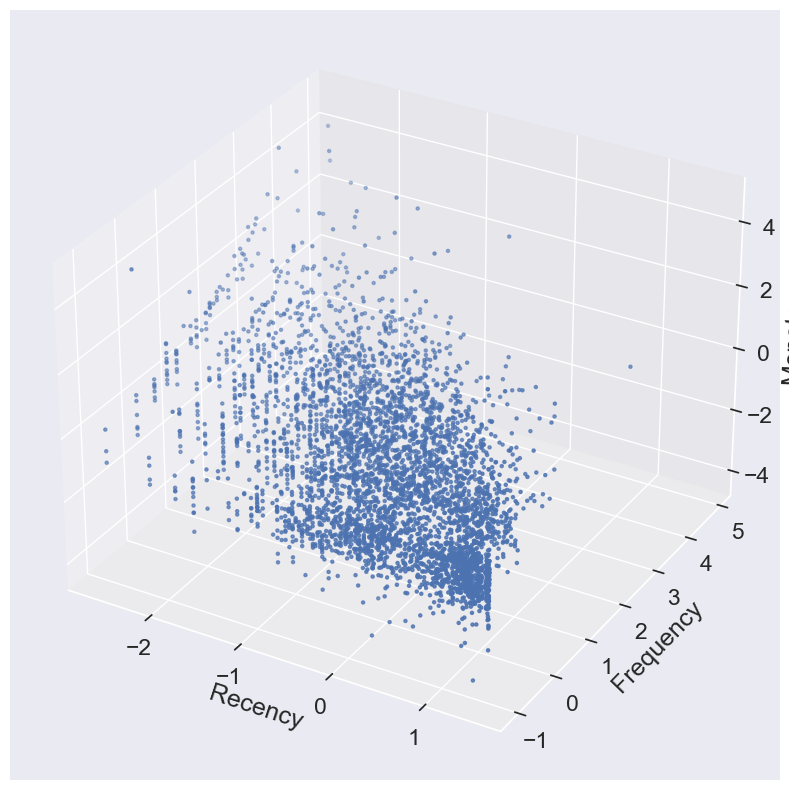

In [21]:
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='recency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(222); sns.regplot(x='frequency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='amount_log', data=customer_history_df)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='amount_log', data=customer_history_df)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

#### **Nhận xét:**
- Từ biểu đồ của amount và recency, ta có thể thấy rằng các khách hàng mua sắm ở thời điểm gần đây thường chi tiêu nhiều hơn cho việc mua sắm của mình, còn những khách hàng đã lâu không mua thì lại chi thấp hơn. Điều này có thể cho thấy các khách hàng lâu không mua đã không hài lòng với các sản phẩm của công ty
- Chúng ta cũng có thể thấy các khách hàng mua thường xuyên hơn thường cũng chi tiêu cao hơn dựa vào biểu đồ amount và frequency

# 4. Modeling - Kmean

#### **Phương pháp Elbow:**

Sử dụng phương pháp khuỷu tay (Elbow) để tìm số lượng cụm tối ưu. Ý tưởng đằng sau phương pháp khuỷu tay là xác định giá trị của k tại đó độ gấp khúc bắt đầu tăng nhanh nhất. Nếu k tăng, độ biến dạng của các cụm sẽ giảm, bởi vì các mẫu sẽ gần với trọng tâm cụm.

Phương pháp này xem xét phần trăm phương sai được giải thích như một hàm của số lượng cụm. Chính xác hơn, nếu ta vẽ biểu đồ phần trăm phương sai được giải thích bởi các cụm so với số lượng các cụm, các cụm đầu tiên sẽ bổ sung nhiều thông tin (giải thích nhiều phương sai), nhưng tại một số điểm, mức tăng cận biên sẽ giảm xuống (Số lượng cụm tăng, phương sai giảm), tạo ra một góc trong đồ thị, đây sẽ là điểm chọn số lượng cho cụm, do đó có "tiêu chí khuỷu tay". Phần trăm phương sai được giải thích là tỷ lệ giữa phương sai giữa nhóm với tổng phương sai, còn được gọi là F-test. Một biến thể nhỏ của phương pháp này vẽ biểu đồ độ cong của phương sai trong cụm

#### **Yêu cầu 14: Thực hiện đoạn mã bên dưới với X_scaled chính là dữ liệu sau khi chuẩn hoá, X_scaled sẽ có chiều như sau: (4338, 3)**

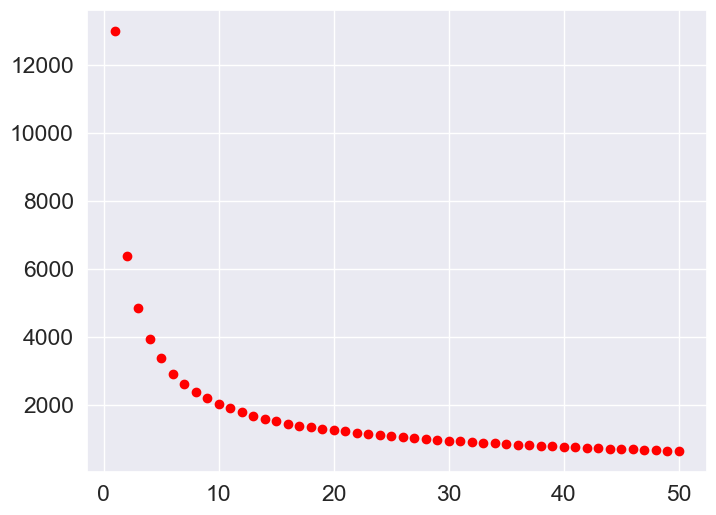

The best K sugest:  7


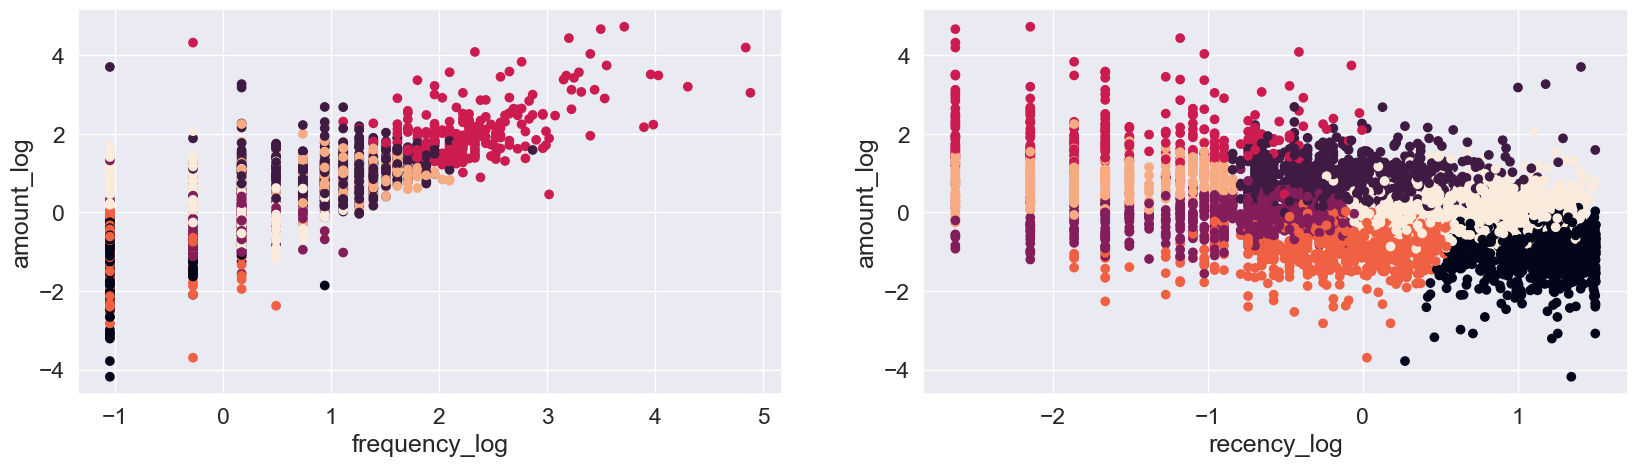

In [22]:
X_scaled = customer_history_df_log_standardized
cl = 50
corte = 0.1

anterior = 100000000000000
cost = []
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k,
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

model = model.fit(X_scaled)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

# And we'll visualize it:
#plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled.iloc[:,1], y = X_scaled.iloc[:,2], c=model.labels_.astype(float))
ax.set_xlabel(X_scaled.columns.values[1])
ax.set_ylabel(X_scaled.columns.values[2])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled.iloc[:,0], y = X_scaled.iloc[:,2], c=model.labels_.astype(float))
ax.set_xlabel(X_scaled.columns.values[0])
ax.set_ylabel(X_scaled.columns.values[2])

plt.show()

Khi sử dụng phương pháp Elbow bắt đầu với K bằng 3, chúng ta quan sát thấy với k = 7 thì độ giảm phương sai của cụm mạnh nhất với 10%. Từ đặc điểm này nên chúng ta sẽ bắt đầu đánh giá sâu hơn với k từ 3 đến 7. Chúng ta sẽ sử dụng phương pháp phân tích Silhouette.

**Bổ sung lý thuyết:**

Phân tích **Silhouette** trong phân cụm Kmeans

Phân tích Silhouette có thể được sử dụng để nghiên cứu khoảng cách giữa các cụm , như một chiến lược để định lượng chất lượng của việc phân nhóm hay phân cụm thông qua trực quan hoá để vẽ biểu đồ đo lường mức độ "chặt chẽ nhóm" của các mẫu trong các cụm. Biểu đồ Silhouette hiển thị thước đo mức độ gần của mỗi điểm trong một cụm với các điểm trong các cụm lân cận và do đó cung cấp cách để đánh giá các thông số như số lượng cụm một cách trực quan.

Cách phân tích này cũng có thể được áp dụng cho các thuật toán phân cụm khác ngoài k-means.

Hệ số Silhouette có phạm vi [-1, 1], và được tính bằng:
1. a(i) là khoảng cách trung bình giữa mẫu x(i) và tất cả các điểm khác trong cùng một cụm.
2. b(i) từ cụm gần nhất tiếp theo là khoảng cách trung bình giữa mẫu x(i) và tất cả các mẫu trong cụm gần nhất.
3. s(i) là sự khác biệt giữa a(i) và b(i) chia cho max(a(i), b(i)), như được hiển thị ở đây:

\begin{align}
\text{s(i)} = \frac{b(i) - a(i)}{max\{a(i), b(i)\}}
\end{align}

Một cách viết khác của công thức trên:

\begin{align}
        \text{s}(i) = \left\{
        \begin{array}{cl}
        1 - a(i)/b(i), & \text{if } a(i) < b(i) \\
        0, & \text{if } a(i) = b(i) \\
        b(i)/a(i) - 1, & \text{if } a(i) > b(i)
        \end{array}
        \right.
    \end{align}

Trong đó:
* Nếu gần +1, có nghĩa rằng mẫu ở xa các cụm lân cận.
* Giá trị cao chỉ ra rằng đối tượng được đối sánh tốt với cụm riêng của nó và đối sánh kém với các cụm lân cận.
* Nếu hầu hết các đối tượng có giá trị cao, thì cấu hình phân cụm là thích hợp.
* Nếu nhiều điểm có giá trị thấp hoặc âm, thì cấu hình phân cụm có thể có quá nhiều hoặc quá ít cụm.
* Giá trị 0 cho biết mẫu nằm trên hoặc rất gần ranh giới quyết định giữa hai cụm lân cận
* Giá trị âm chỉ ra rằng những mẫu đó có thể đã được chỉ định vào sai nhóm.

K được coi là không tốt khi các cụm có điểm Silhouette dưới trung bình hoặc có sự biến động lớn về kích thước của các ô Silhouette. K được coi là tốt khi tất cả các ô có độ dày tương tự hoặc không khác nhau nhiều hay nói cách khác tất cả các ô có kích thước tương tự.

Mặc dù chúng ta phải lưu ý rằng trong một số trường hợp và tình huống, đôi khi chúng ta có thể phải loại bỏ giải thích toán học do thuật toán đưa ra và xem xét mức độ phù hợp kinh doanh của kết quả thu được.

Hãy xem dữ liệu của chúng ta hoạt động như thế nào đối với từng giá trị K (3, 5 và 7) trong điểm Silhouette của mỗi cụm, cùng với trọng tâm của mỗi cụm được được đánh dấu trong các biểu đồ scatter, chúng ta sẽ phân cụm với 3 biến đầu vào là amount_log, recency_log, frequency_log nhưng sẽ hiển thị trên scatter theo từng cặp (amount_log, recency_log) và (amount_log, frequency_log)



#### **Yêu cầu 15: Chạy thành công đoạn mã bên dưới:**

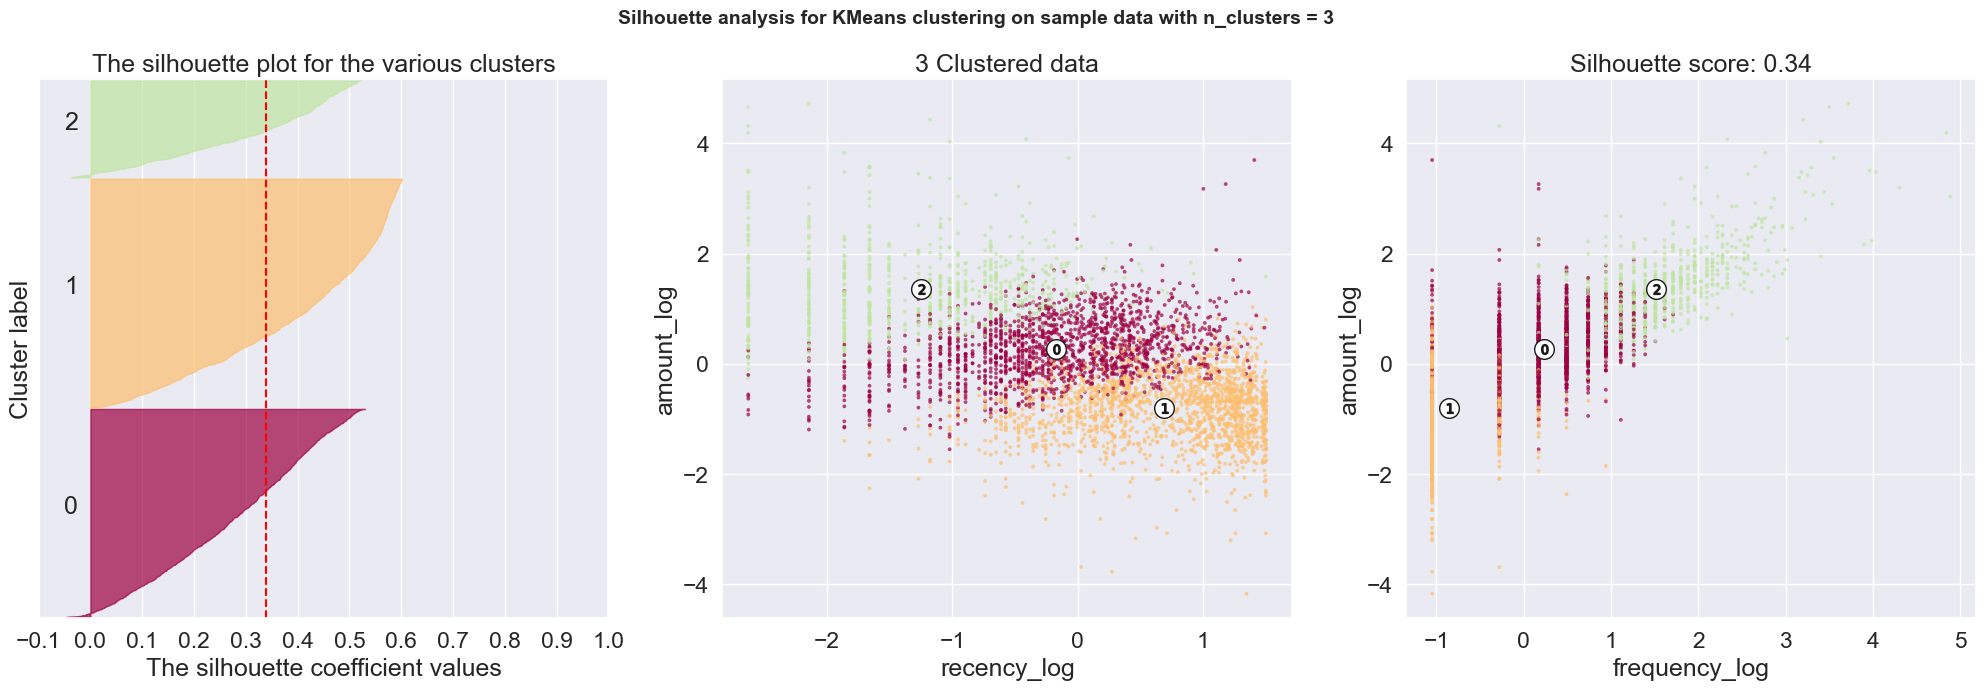

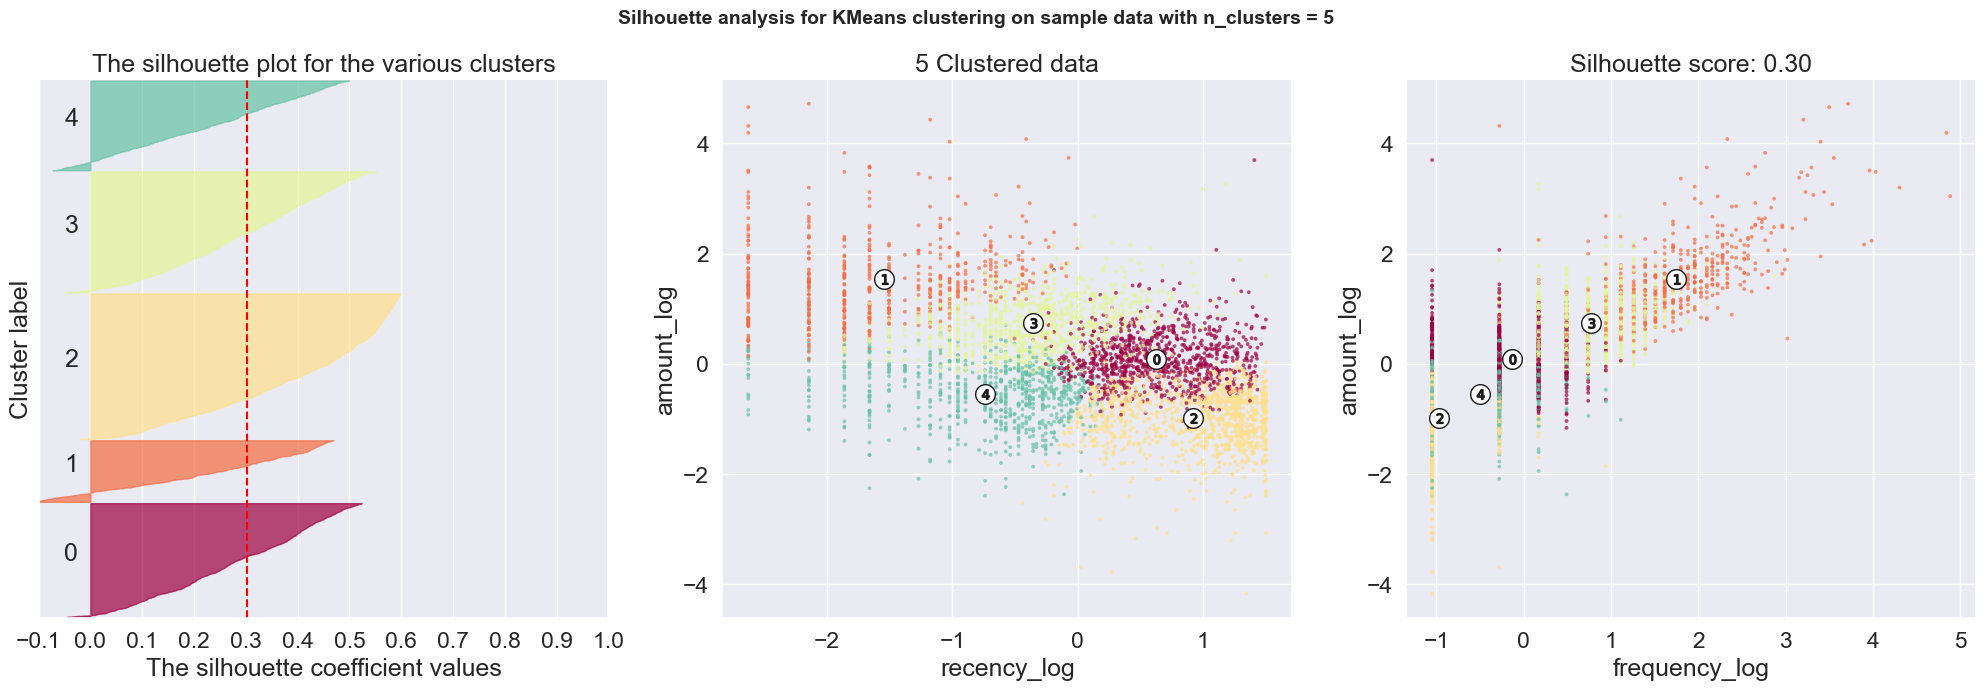

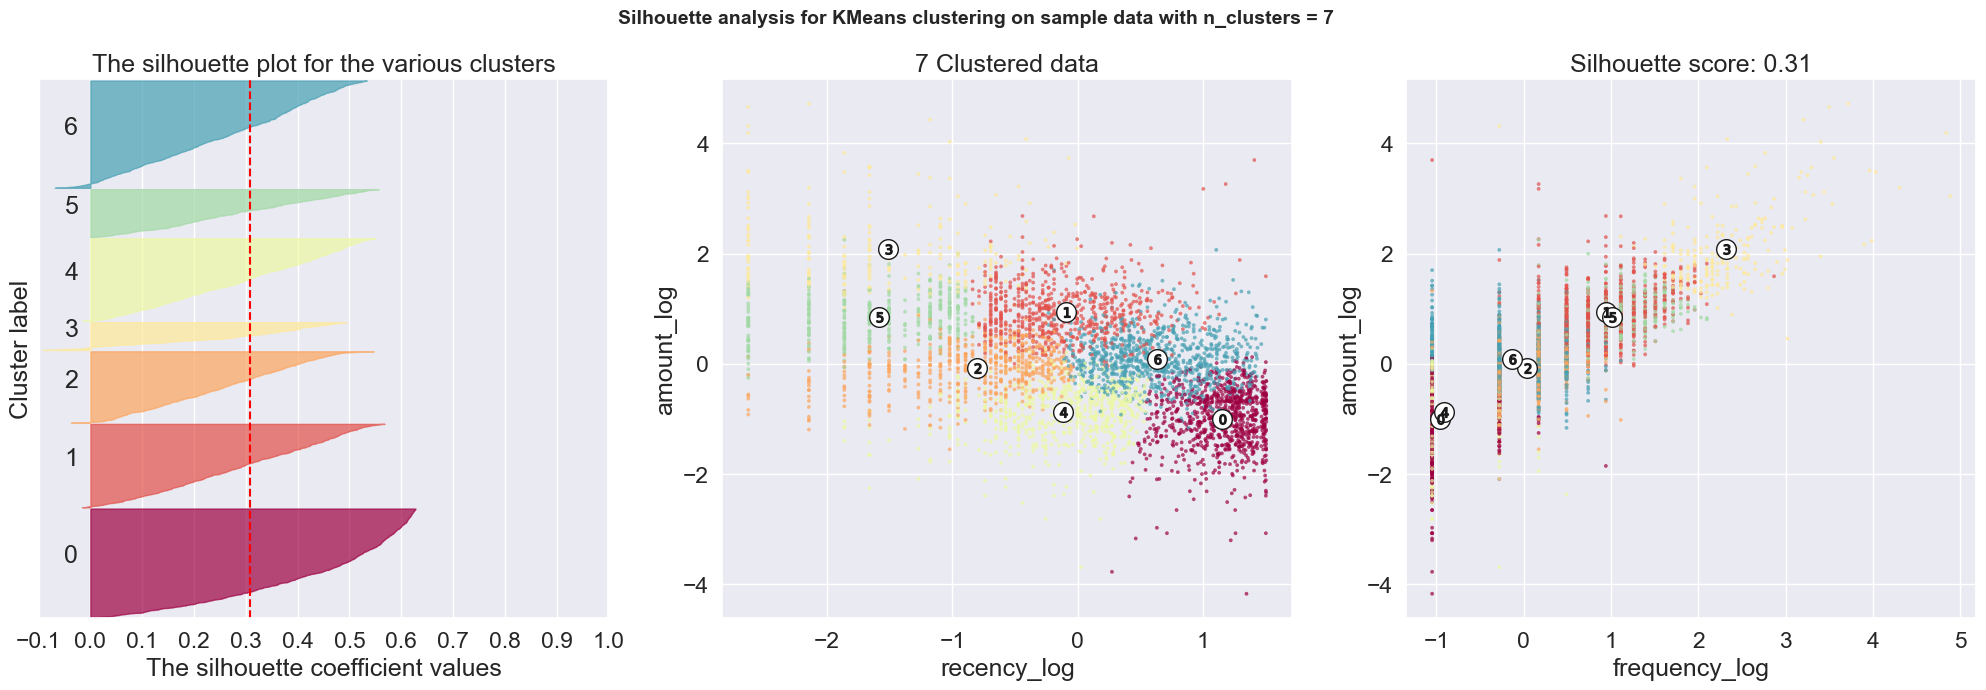

In [23]:

cluster_centers = dict()

for n_clusters in range(3,K_best+1,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                            })

    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = mpl.colormaps.get_cmap("Spectral")(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = mpl.colormaps.get_cmap("Spectral")(cluster_labels.astype(float) / n_clusters)

    centers = clusterer.cluster_centers_
    y = 2
    x = 0
    ax2.scatter(X_scaled.iloc[:, x], X_scaled.iloc[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(X_scaled.columns.values[x])
    ax2.set_ylabel(X_scaled.columns.values[y])

    x = 1
    ax3.scatter(X_scaled.iloc[:, x], X_scaled.iloc[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(X_scaled.columns.values[x])
    ax3.set_ylabel(X_scaled.columns.values[y])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [24]:
cm.Spectral

matplotlib.cm.Spectral

#### **Yêu cầu 16: Từ hình ảnh trực quan ở yêu cầu 15 hãy đưa ra một số nhận xét chung**

- Điểm số silhouette của từng cluster 3,5,7 đều đạt xấp xỉ ở khoảng 0.3, nghĩa là các cụm tuy được phân tách với nhau nhưng không được rõ ràng hoàn toàn. Dễ nhận thấy nhất là ở các hình có những data point của cụm này nhưng lại bị overlap lên khu vực của cụm khác
- Tuy k=3 có điểm số silhouette cao nhất (0.34) nhưng các cụm lại được phân bổ không đều vì có thể thấy cụm 2 nhỏ hơn rõ rệt so với cụm 0,1. Vì vậy không thể chọn k = 3
- K = 5 tuy các cụm được phân bố đồng đều hơn, tuy nhiên nó lại có các điểm mang giá trị âm nhiều nhất và có điểm silhouette thấp nhất. Vì vậy loại k = 5
- Ở K=7, các cụm đều có điểm số silhouette khá cao và đồng đều với nhau. Vì vậy nên chọn k = 7

##  Clusters Center

Hãy xem xét các giá trị trung tâm cụm được ánh xạ ngược lại từ các cụm tính trên thang đo log và Stardartcaler

#### **Yêu cầu 17: Chạy thành công đoạn mã bên dưới để hiển thị các tâm cụm**

In [25]:
features = ['recency','frequency','amount']
for i in range(3,K_best+1,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    scaler = StandardScaler().fit(customer_history_df_log[features])
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

for 3 clusters the silhouette score is 0.34
Centers of each cluster:
      recency  frequency       amount
0   33.637514   3.171771  1019.114007
1  115.772727   1.196009   262.853859
2    7.173427  10.099071  3983.322212
--------------------------------------------------
for 5 clusters the silhouette score is 0.30
Centers of each cluster:
      recency  frequency       amount
0  105.524342   2.279822   813.621211
1    4.728829  12.403678  5051.937209
2  162.151056   1.075721   208.013492
3   25.873099   5.126046  1830.850445
4   15.050233   1.644625   366.981282
--------------------------------------------------
for 7 clusters the silhouette score is 0.31
Centers of each cluster:
      recency  frequency        amount
0  225.646442   1.084052    205.487848
1   37.751906   6.002805   2401.476039
2   13.675696   2.647270    657.936736
3    4.926439  20.646017  10143.118638
4   36.717710   1.130641    239.411000
5    4.458579   6.365225   2114.266897
6  107.556965   2.277767    814.574493

# 5. Clusters Insights

#### **Yêu cầu 18: Phân tích với từng K**

Gợi ý: Các bạn hãy nhận xét đặc điểm của từng từng cụm đối với từng K



Với các ô và tâm ở các đơn vị chính xác, chúng ta hãy xem một số thông tin chi tiết theo từng nhóm cụm:

* Trường hợp có 3 cluster:
    * Nhóm khách hàng được chia làm 3. Nhóm 1 được xem là khách hàng ít dành sự quan tâm nhất cho sản phẩm công ty vì họ vừa có lượng chi tiêu thấp, tần suất mua thấp và đã mua từ khá lâu rồi
    * Nhóm 2 là nhóm khách hàng chính vì họ chi nhiều tiền, thường xuyên mua sắm nhất và lần cuối mua cũng là ngắn nhất. Nhóm khách hàng này nên được công ty ưu tiên nhất.
    * Nhóm 0 nằm ở giữa nhóm 1 và 2, họ cũng chi kha khá nhưng không thường xuyên cho lắm
    
* Trường hợp có 5 cluster
    * Nhóm 1 được xem như là nhóm 2 ở k = 3 và là nhóm khách hàng chính
    * Nhóm 2 và 4 tương đương với nhóm 1, là nhóm khách hàng ít mua sắm
    * Nhóm 0 và 3 tương đương với nhóm 0, là nhóm khách hàng chi tiêu vừa phải
* Trường hợp có 7 cluster:
    * Ở trường hợp này sự phân chia rõ rệt hơn khi nhóm 3 là nhóm khách hàng premium. Tổng chi của họ cao gấp vài lần tổng chi của các nhóm còn lại và còn mua thường xuyên hơn.
    * Nhóm 1 cũng là 1 tập khách hàng ở mức vừa, tuy mua ít đơn hàng nhưng mỗi đơn lại có giá trị cao và lâu lâu mới mua
    * Nhóm 5 cũng tương đồng với nhóm 1 tuy nhiên họ hay mua hơn
    * Nhóm 0 và 4 nên được chú ý để xem lại chiến lược công ty thì họ thường chỉ mua 1-2 đơn rồi không quay lại mua hàng nữa
    * Nhóm 2 chi tiêu khá ít nhưng lại mua gần đây hơn, đối lập với nhóm 6, có chi tiêu khá tương đương nhưng đã lâu rồi không mua hàng





#6.  Tìm hiểu sâu về các cụm:
Để đi sâu hơn về đặc điểm của các cụm và tìm ra chất lượng của những khác biệt giữa các cụm, chúng ta có thể gắn nhãn dữ liệu của mình bằng nhãn cụm tương ứng và sau đó trực quan hóa những tính năng để tìm sự khác biệt.

#### **Yêu cầu 19: Viết mã để trực quan hoá tỷ lệ khách hàng trong từng cụm ứng với mỗi K**

Khi chúng ta đã gán nhãn cho từng khách hàng, nhiệm vụ tiếp theo khá đơn giản. Bây giờ chúng ta sẽ hiểu một cách tóm tắt về khách hàng trong mỗi nhóm khác nhau như thế nào. Nếu có thể hình dung thông tin này, chúng ta sẽ có thể tìm ra sự khác biệt trong các nhóm khách hàng và từ đó có thể sửa đổi chiến lược bán hàng marketing trên cơ sở những khác biệt đó.

,recency,frequency,amount,recency_log,frequency_log,amount_log,clusters_3,clusters_5,clusters_7
CustomerID,,,,,,,,,
12346,326,1,77183.60,1.409894,-1.048610,3.698719,0,0,1
12347,2,7,4310.00,-2.146498,1.111836,1.410201,2,1,5
12348,75,4,1797.24,0.383971,0.490522,0.716419,0,3,1
12349,19,1,1757.55,-0.574674,-1.048610,0.698706,0,4,2
12350,310,1,334.40,1.374758,-1.048610,-0.617446,1,2,0


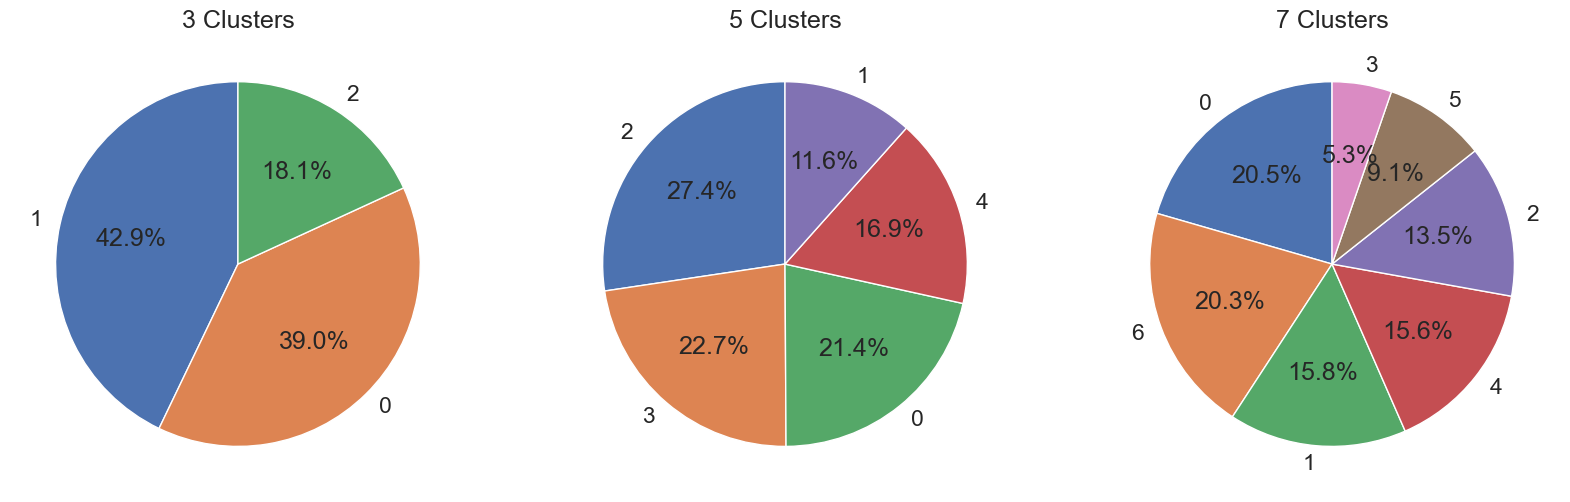

In [26]:
customer_history_df['clusters_3'] = cluster_centers[3]['labels']
customer_history_df['clusters_5'] = cluster_centers[5]['labels']
customer_history_df['clusters_7'] = cluster_centers[7]['labels']
display(customer_history_df.head())

fig = plt.figure(figsize=(20,7))
f1 = fig.add_subplot(131)
market = customer_history_df['clusters_3'].value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', startangle=90)
plt.title('3 Clusters')

f1 = fig.add_subplot(132)
market = customer_history_df['clusters_5'].value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', startangle=90)
plt.title('5 Clusters')

f1 = fig.add_subplot(133)
market = customer_history_df['clusters_7'].value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', startangle=90)
plt.title('7 Clusters')
plt.show()

#### **Nhận xét**
* Dựa vào nhận xét ở yêu cầu 18 thì đã biết, với k = 3, nhóm 1 là nhóm ít quan tâm nhất, kết hợp với biểu đồ này ta có thể thấy rằng họ cũng có số lượng đông nhất. Vì vậy phải xem lại sản phẩm của công ty có vấn đề gì mà họ lại bỏ đi
* Theo biểu đồ tròn của k = 5, số lượng khách hàng được coi là thân thiết chiếm trọng số còn nhỏ hơn so với k = 3 (11.6% vs 18,1%). Công ty phải nghĩ ra thêm cách để tăng số lượng này lên
* Ở k=7, nhóm khách hàng cao nhất chỉ chiếm 5.3% trong tổng số khách hàng. Ngoài ra, lượng khách hàng chi tiêu vừa chiếm 24.9% (15.8% + 9.1%)

#### **Yêu cầu 20: Trực quan hoá số tiền khách hàng đã mua hàng trong từng cụm ứng với mỗi K, sau đó đưa ra nhận xét**

Gợi ý: Sử dụng Box plot

Biểu đồ hộp cho phép xem các giá trị xu hướng trung tâm trong mỗi biến. Chúng ta sẽ loại bỏ các giá trị ngoại lệ của mỗi nhóm, vì chúng sẽ cản trở việc quan sát tốt các xu hướng trung tâm của mỗi nhóm. Vì dữ liệu chỉ có các giá trị dương, nên chúng ta sẽ hạn chế dữ liệu sao cho chỉ sử dụng các điểm dữ liệu nhỏ hơn 0.95 phần trăm của cụm. Điều này sẽ cung cấp thông tin tốt về phần lớn người dùng trong mỗi cụm.

Chúng ta sẽ dùng biểu đồ hộp dưới đây để xem các ý đã nêu ra trong việc phân tích từng cụm ứng với mỗi K phía trên:

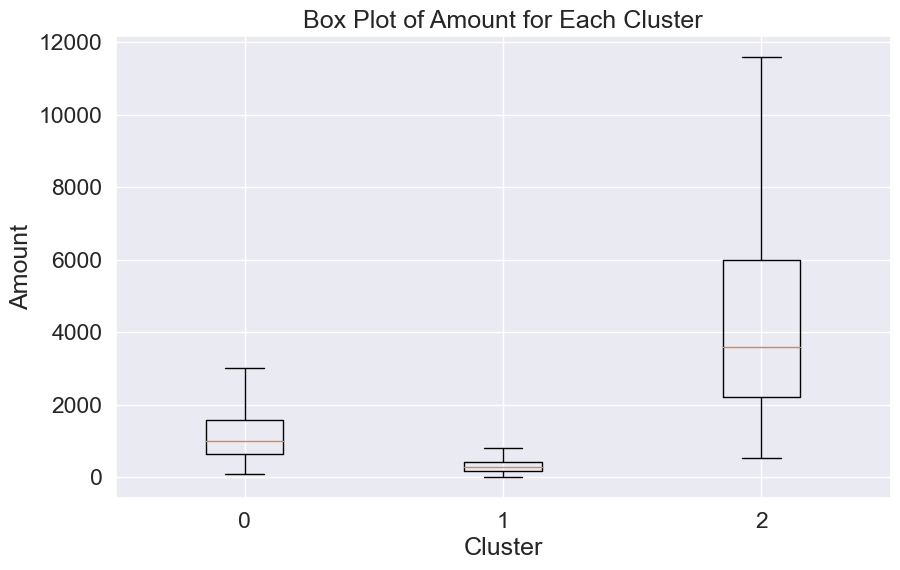

In [27]:
data_by_cluster = [customer_history_df['amount'][customer_history_df['clusters_3'] == cluster] for cluster in sorted(customer_history_df['clusters_3'].unique())]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_by_cluster, labels=sorted(customer_history_df['clusters_3'].unique()), showfliers=False)
plt.title('Box Plot of Amount for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Amount')
plt.show()

In [ ]:
customer_history_df['recency'][customer_history_df['amount'] == 77183.60]

#### *Nhận xét**
* Qua biểu đồ trên thì nhóm 1 có chi tiêu thấp nhất vì xu hướng tập trung ở điểm trung vị ở mức thấp nhất
* Nhóm 2 là nhóm chi tiêu cao nhất, và 50% khách hàng trong nhóm đó chi tiêu tầm gần 4000 và hơn 75% khách hàng đều chi cao hơn 2000

In [ ]:
data_by_cluster = [customer_history_df['amount'][customer_history_df['clusters_5'] == cluster] for cluster in sorted(customer_history_df['clusters_5'].unique())]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_by_cluster, labels=sorted(customer_history_df['clusters_5'].unique()), showfliers=False)
plt.title('Box Plot of Amount for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Amount')
plt.show()

#### *Nhận xét**
* Qua biểu đồ trên thì nhóm 2 và 4 có chi tiêu thấp nhất vì xu hướng tập trung ở điểm trung vị ở mức thấp nhất
* Nhóm 0 chỉ có duy nhất 1 khách hàng là chi ở mức khá cao là 2000
* Nhóm 1 là nhóm chi tiêu cao nhất  với hơn 75% khách hàng đã chi tiêu gần 3000
* Nhóm 3 cũng chi khá là cao với 50% trong số họ đã chi hơn 2000

In [ ]:
data_by_cluster = [customer_history_df['amount'][customer_history_df['clusters_7'] == cluster] for cluster in sorted(customer_history_df['clusters_7'].unique())]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data_by_cluster, labels=sorted(customer_history_df['clusters_7'].unique()), showfliers=False)
plt.title('Box Plot of Amount for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Amount')
plt.show()

#### *Nhận xét**
* Nhóm 3 là rõ ràng là nhóm chi cao nhất trong khi chỉ trong số 75% khách hàng của họ đã có lượng chi tiêu thấp nhất gần bằng khách hàng lớn nhất ở nhóm 1 và 5
* Nhóm 0, 2, 4, 6 chi tiêu hầu như không đáng kể vì phần đông họ chi ở mức 100-500